#### Usando randomsearch para buscar los mejores hiperparametros en xgboost

In [2]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from xgboost.sklearn import XGBRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import Imputer

import matplotlib.pyplot as plt
import utils.encodeador as my_encoder
import utils.featurizerV2 as ft_v2

import re

from math import sqrt

In [3]:
train = pd.read_csv("data/train.csv")
test = pd.read_csv("data/test.csv")


In [4]:
df_test = pd.read_csv("data/test.csv")

In [5]:
train = ft_v2.featurizerv2(train,"train")
test = ft_v2.featurizerv2(test,"test")

In [6]:
train.shape

(240000, 56)

In [7]:
test.shape

(60000, 55)

In [8]:
drop_cols = ['id','titulo','descripcion','direccion','fecha']

In [9]:
X = train.drop(['precio'] + drop_cols, axis=1)
test = test.drop(drop_cols, axis=1)
y = train['precio']

In [10]:
X.columns

Index(['tipodepropiedad', 'ciudad', 'provincia', 'antiguedad', 'habitaciones',
       'garages', 'banos', 'metroscubiertos', 'metrostotales', 'idzona', 'lat',
       'lng', 'gimnasio', 'usosmultiples', 'piscina', 'escuelascercanas',
       'centroscomercialescercanos', 'seguridad', 'plazas_y_derivados',
       'patio_o_jardin', 'en_avenida', 'con_referencias_acuaticas',
       'cantidad_de_beneficios', 'con_referencias_turisticas', 'es_habitable',
       'dolar', 'devaluacion_acumulada', 'year', 'mes', 'dia_del_mes',
       'dia_del_anio', 'quarter', 'dia_de_semana', 'es_finde', 'aire_libre',
       'is_DF', 'x', 'y', 'z', 'mean_metroscubiertos_tipodepropiedad',
       'mean_metrostotales_tipodepropiedad', 'mean_gimnasio_tipodepropiedad',
       'mean_usosmultiples_tipodepropiedad', 'mean_piscina_tipodepropiedad',
       'mean_escuelascercanas_tipodepropiedad',
       'mean_centroscomercialescercanos_tipodepropiedad',
       'mean_garages_tipodepropiedad', 'mean_banos_tipodepropiedad',

In [11]:
X,test = my_encoder.oneHotEncoder(X,test)

In [12]:
X.shape

(240000, 632)

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [14]:
hyper_param = { 'objective' :'reg:squarederror', 
                'colsample_bytree' : 0.3, 
               'learning_rate' : 0.1,
                'max_depth' : 15,
               'alpha' : 10,
               'n_estimators' : 300,
               'eval_metric' : 'mae'
              }

In [15]:
xgb = XGBRegressor(**hyper_param)

In [16]:
parameters = {
    'max_depth': [5, 10, 15, 20],
    'n_estimators': [100, 300, 500],
    'min_child_weight': [1, 5, 10, 25],
    'learning_rate': [0.1, 0.01, 0.05],
    'subsample': [0.5,0.8,1],
    'colsample_bytree': [0.5,0.8,1],
    'gamma': [0.5, 1, 2, 5],
    'colsample_bytree': [0.5, 0.75, 1]
}


In [17]:
xgb_gs = GridSearchCV(xgb, param_grid= parameters, scoring='neg_median_absolute_error',n_jobs=6, verbose = 15 )


In [68]:
%%time
xgb_gs.fit(X_train,y_train)


Fitting 3 folds for each of 5184 candidates, totalling 15552 fits


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done   1 tasks      | elapsed:  3.1min
[Parallel(n_jobs=6)]: Done   2 tasks      | elapsed:  3.2min
[Parallel(n_jobs=6)]: Done   3 tasks      | elapsed:  4.0min
[Parallel(n_jobs=6)]: Done   4 tasks      | elapsed:  4.0min
[Parallel(n_jobs=6)]: Done   5 tasks      | elapsed:  4.3min
[Parallel(n_jobs=6)]: Done   6 tasks      | elapsed:  4.7min
[Parallel(n_jobs=6)]: Done   7 tasks      | elapsed:  6.4min
[Parallel(n_jobs=6)]: Done   8 tasks      | elapsed:  6.7min
[Parallel(n_jobs=6)]: Done   9 tasks      | elapsed:  6.8min
[Parallel(n_jobs=6)]: Done  10 tasks      | elapsed: 13.7min
[Parallel(n_jobs=6)]: Done  11 tasks      | elapsed: 14.3min
[Parallel(n_jobs=6)]: Done  12 tasks      | elapsed: 17.8min
[Parallel(n_jobs=6)]: Done  13 tasks      | elapsed: 18.0min
[Parallel(n_jobs=6)]: Done  14 tasks      | elapsed: 18.4min
[Parallel(n_jobs=6)]: Done  15 tasks      | elapsed: 19.0min
[Parallel(

[Parallel(n_jobs=6)]: Done 133 tasks      | elapsed: 275.1min
[Parallel(n_jobs=6)]: Done 134 tasks      | elapsed: 276.5min
[Parallel(n_jobs=6)]: Done 135 tasks      | elapsed: 277.3min
[Parallel(n_jobs=6)]: Done 136 tasks      | elapsed: 278.2min
[Parallel(n_jobs=6)]: Done 137 tasks      | elapsed: 280.3min
[Parallel(n_jobs=6)]: Done 138 tasks      | elapsed: 282.5min
[Parallel(n_jobs=6)]: Done 139 tasks      | elapsed: 284.7min
[Parallel(n_jobs=6)]: Done 140 tasks      | elapsed: 284.8min
[Parallel(n_jobs=6)]: Done 141 tasks      | elapsed: 284.9min
[Parallel(n_jobs=6)]: Done 142 tasks      | elapsed: 285.5min
[Parallel(n_jobs=6)]: Done 143 tasks      | elapsed: 286.8min
[Parallel(n_jobs=6)]: Done 144 tasks      | elapsed: 295.3min
[Parallel(n_jobs=6)]: Done 145 tasks      | elapsed: 301.5min
[Parallel(n_jobs=6)]: Done 146 tasks      | elapsed: 302.9min
/home/braianvillalba/.local/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped

[Parallel(n_jobs=6)]: Done 261 tasks      | elapsed: 743.2min
[Parallel(n_jobs=6)]: Done 262 tasks      | elapsed: 774.2min
[Parallel(n_jobs=6)]: Done 263 tasks      | elapsed: 781.1min
[Parallel(n_jobs=6)]: Done 264 tasks      | elapsed: 783.1min
[Parallel(n_jobs=6)]: Done 265 tasks      | elapsed: 786.2min
[Parallel(n_jobs=6)]: Done 266 tasks      | elapsed: 788.5min
[Parallel(n_jobs=6)]: Done 267 tasks      | elapsed: 796.0min
[Parallel(n_jobs=6)]: Done 268 tasks      | elapsed: 799.0min
[Parallel(n_jobs=6)]: Done 269 tasks      | elapsed: 800.9min
[Parallel(n_jobs=6)]: Done 270 tasks      | elapsed: 805.5min
[Parallel(n_jobs=6)]: Done 271 tasks      | elapsed: 807.1min
[Parallel(n_jobs=6)]: Done 272 tasks      | elapsed: 812.8min
[Parallel(n_jobs=6)]: Done 273 tasks      | elapsed: 813.7min
[Parallel(n_jobs=6)]: Done 274 tasks      | elapsed: 814.5min
[Parallel(n_jobs=6)]: Done 275 tasks      | elapsed: 819.7min
[Parallel(n_jobs=6)]: Done 276 tasks      | elapsed: 820.7min
[Paralle

KeyboardInterrupt: 

In [ ]:
gs.best_score

In [19]:
hyper_op_before_gs = {
    'colsample_bytree' :0.5, 
    'gamma' : 0.5, 
    'learning_rate' : 0.1,
    'max_depth' : 20, 
    'min_child_weight' : 1, 
    'n_estimators' : 100, 
    'subsample' : 0.5
}

In [20]:
# hyperOpt = {
#     'objective' :'reg:squarederror', 
#     'colsample_bytree' : 0.5, 
#     'learning_rate' : 0.1,
#     'max_depth' : 15,
#     'alpha' : 10,
#     'n_estimators' : 300,
#     'eval_metric' : 'mae',
#     'subsample' : 1,
#     'min_child_weight' : 25,
#     'gamma' : 5
# }

In [21]:
hyper_param

{'objective': 'reg:squarederror',
 'colsample_bytree': 0.3,
 'learning_rate': 0.1,
 'max_depth': 15,
 'alpha': 10,
 'n_estimators': 300,
 'eval_metric': 'mae'}

In [22]:
hyper_param.update(hyper_op_before_gs)

In [23]:
hyper_param

{'objective': 'reg:squarederror',
 'colsample_bytree': 0.5,
 'learning_rate': 0.1,
 'max_depth': 20,
 'alpha': 10,
 'n_estimators': 100,
 'eval_metric': 'mae',
 'gamma': 0.5,
 'min_child_weight': 1,
 'subsample': 0.5}

In [51]:
xgb = XGBRegressor(**hyperOpt)

In [24]:
from datetime import datetime
datetime.now()

In [25]:
%%time
xgb.fit(X_train, y_train)

/home/braianvillalba/.local/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


CPU times: user 13min 21s, sys: 1.98 s, total: 13min 23s
Wall time: 13min 23s


XGBRegressor(alpha=10, base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.3, eval_metric='mae',
             gamma=0, importance_type='gain', learning_rate=0.1,
             max_delta_step=0, max_depth=15, min_child_weight=1, missing=None,
             n_estimators=300, n_jobs=1, nthread=None,
             objective='reg:squarederror', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
             subsample=1, verbosity=1)

In [28]:
pred = xgb.predict(X_test)

In [29]:
mean_absolute_error(y_test,pred)

538715.6543642741

In [32]:
predicion = xgb.predict(test)

In [33]:
resultado = pd.DataFrame(predicion, index=df_test.id, columns=['target'])
display(resultado.head())
resultado.to_csv("data/workshop-xgboost-v8_0.csv", header=True) 

,target
id,
4941,6.171820e+06
51775,1.067168e+06
115253,2.284632e+06
299321,1.428522e+06
173570,5.903374e+05


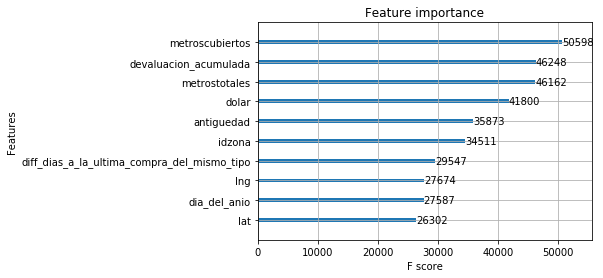

In [36]:
import matplotlib.pylab as plt
from matplotlib import pyplot
from xgboost import plot_importance
plot_importance(xgb, max_num_features=10) # top 10 most important features
plt.show()